In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nMTCD = 1000
MTCD_grouping = pd.read_csv(f'MTCD_grouping_{nMTCD}.csv', index_col=False)
MTCD_grouping.head()

,MTCD_id,x,y,clusters
0,0,719.500,-693.657,0
1,1,52.387,958.314,1
2,2,-580.075,541.164,2
3,3,669.008,29.018,3
4,4,619.936,-435.117,4


In [3]:
np.unique(MTCD_grouping.clusters)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  33,  35,  38,  39,  40,  42,  43,  44,  45,  46,  47,
        48,  50,  51,  53,  54,  55,  59,  60,  63,  66,  67,  68,  74,
        75,  80,  81,  82,  85,  87,  88,  89,  91,  92,  94,  95,  96,
        97,  98, 100, 102, 103, 105, 106, 112, 113, 117, 118, 122, 123,
       125, 126, 127, 129, 134, 137, 141, 147, 148, 149, 150, 156, 158,
       159, 161, 163, 165, 178, 185, 187, 188, 198, 204, 208, 210, 212,
       213, 219, 224, 226, 230, 237, 240, 241, 249, 251, 252, 253, 271,
       274, 286, 291, 293, 308, 312, 314, 332, 333, 335, 343, 345, 350,
       358, 367, 380, 397, 406, 434, 437, 439, 450, 493, 503, 505, 518,
       534, 535, 553, 554, 562, 583, 592, 608, 617, 647, 679, 689, 704,
       713, 716, 817, 823, 827, 872, 875, 978, 985])

In [4]:
group_sizes = MTCD_grouping['clusters'].value_counts().sort_index()
group_sizes

0      2
1      6
2      7
3      7
4      7
      ..
827    6
872    6
875    1
978    4
985    6
Name: clusters, Length: 165, dtype: int64

In [5]:
print(max(group_sizes), min(group_sizes), np.average(group_sizes))

12 1 6.0606060606060606


<BarContainer object of 165 artists>

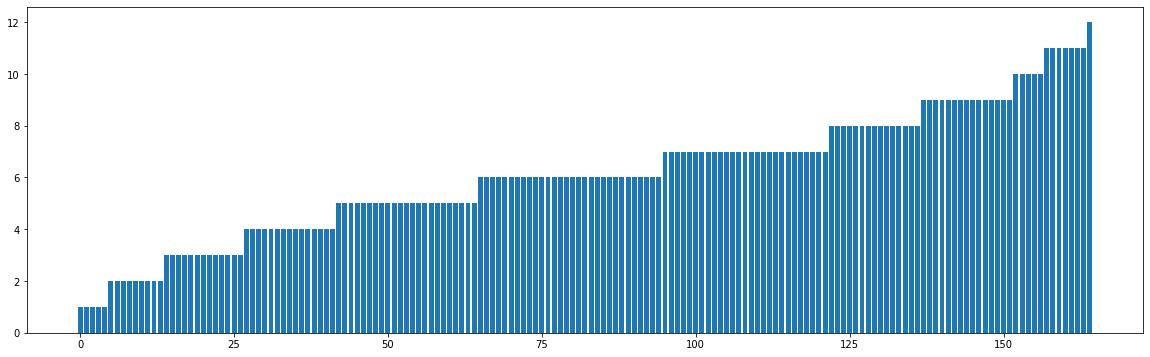

In [6]:
plt.figure(figsize=(20,6))
x = np.arange(len(group_sizes))
plt.bar(x,sorted(group_sizes.values))

<BarContainer object of 12 artists>

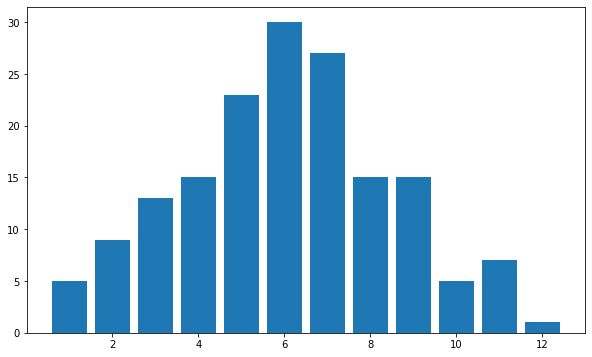

In [7]:
plt.figure(figsize=(10,6))
plt.bar(group_sizes.value_counts().index,group_sizes.value_counts().values)

In [8]:
MTCD_RA = pd.read_csv(f'MTCD_RA_Time_{nMTCD}.csv', index_col=False)
MTCD_RA.head()

,RA_init,RA_first,RA_success,RA_transmit
0,452,452,-1,0
1,307,307,-1,0
2,632,632,-1,0
3,499,499,-1,0
4,182,182,-1,0


In [9]:
MTCD_data = pd.concat([MTCD_grouping, MTCD_RA], axis=1,sort=False)

In [10]:
MTCD_data

,MTCD_id,x,y,clusters,RA_init,RA_first,RA_success,RA_transmit
0,0,719.500,-693.657,0,452,452,-1,0
1,1,52.387,958.314,1,307,307,-1,0
2,2,-580.075,541.164,2,632,632,-1,0
3,3,669.008,29.018,3,499,499,-1,0
4,4,619.936,-435.117,4,182,182,-1,0
...,...,...,...,...,...,...,...,...
995,995,465.318,65.074,713,171,171,-1,0
996,996,-320.210,791.027,823,783,783,-1,0
997,997,-49.175,-314.330,96,220,220,-1,0
998,998,229.023,384.238,46,142,142,-1,0


In [11]:
MTCD_data.to_csv(f'MTCD_data_{nMTCD}.csv', index=False)